In [1]:
import numpy as np

In [2]:
solarconstant = 1366 #W/m2
albedo = 0.3
stefanboltzman = 5.670374419e-8 #W/m2/K4

![image.png](attachment:fb0c2beb-0c3a-44c3-821d-2ff8ee3f9836.png)

In [4]:
Te = (solarconstant*(1-albedo)/(4*stefanboltzman))**(1/4)

In [5]:
print("Average temperature of the earth is %0.4f Kelvin or %0.4f deg C" % (Te, Te-273.15))

Average temperature of the earth is 254.8116 Kelvin or -18.3384 deg C


In [12]:
epsilon = 0.78
T_s = ((solarconstant*(1-albedo) /4) / (stefanboltzman*(1-epsilon/2))) ** (1/4)
T_a = (epsilon*stefanboltzman*T_s**4 / (2*stefanboltzman)) ** (1/4)

In [8]:
print("Average temperature of the earth is %0.4f Kelvin or %0.4f deg C" % (T_s, T_s-273.15))

Average temperature of the earth is 288.3280 Kelvin or 15.1780 deg C


In [13]:
deleps = -4 / (stefanboltzman* T_a**4 - stefanboltzman*T_s**4)
deleps

0.016732901066722455

In [14]:
neweps = epsilon + deleps
neweps

0.7967329010667225

In [15]:
T_s_new = ((solarconstant*(1-albedo) /4) / (stefanboltzman*(1-neweps/2))) ** (1/4)
print("Average temperature of the earth is %0.4f Kelvin or %0.4f deg C" % (T_s_new, T_s_new-273.15))

Average temperature of the earth is 289.3252 Kelvin or 16.1752 deg C


In [16]:
warming = T_s_new - T_s
print(warming)

0.9972030491054511


In [17]:
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [35]:
M = 1
solarconstant = 1366
albedo = 0.3
stefanboltzman = 5.670374419e-8
heatcapacity = 4.0e8 #J/m2/K

In [36]:
u = np.zeros((M,))

def myfun(t, u): 
    f = np.zeros((M,))
    f[0] = (solarconstant*(1-albedo)/4 - stefanboltzman*(u[0]**4))/heatcapacity
    return f

In [33]:
u0 = np.zeros((M,))
t0 = 0.0

Dt = 60*60*365*24
tmax = 100*Dt
t = np.arange(t0,tmax,Dt)
N = np.shape(t)[0]

In [34]:
sol = solve_ivp(myfun, [t0,tmax],u0, method='RK45', t_eval = t)

Text(0, 0.5, 'Temperature (K)')

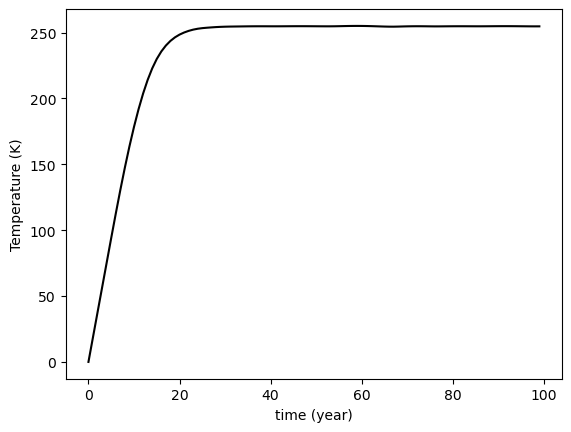

In [37]:
fig = plt.figure()
plt.plot(sol.t/(60*60*365*24),sol.y[0],'k-')
plt.xlabel('time (year)')
plt.ylabel('Temperature (K)')

In [38]:
M = 2 
#u[0] is Ta
#u[1] is Ts

def myfun( t, u): 
    f = np.zeros((M,))
    f[0] = (solarconstant * (1-albedo)/4 - epsilon*stefanboltzman*(u[0]**4) 
            - (1-epsilon)*stefanboltzman*(u[1]**4))/heatcapacity
    f[1] = (solarconstant * (1-albedo)/4 + epsilon*stefanbolzman*(u[0]**4) - 
            stefanboltzman*(u[1]**4))/heatcapacity
    return f
    